# **Question: 01** (2 Marks)

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

a. Find f(2)

b. Find f'(2)

Do not hardcode. Use Polynomial class.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [ ]:
import numpy as np
from numpy.polynomial import Polynomial

# Define the polynomial f(x) = x^5 + 2.5x^4 - 2x^3 - 6x^2 + x + 2
coeffs = [2, 1, -6, -2, 2.5, 1]  # constant term first
f = Polynomial(coeffs)

# (a) Evaluate f(2)
f_at_2 = f(2)

# (b) Evaluate f'(2)
f_prime = f.deriv()
f_prime_at_2 = f_prime(2)

f_at_2, f_prime_at_2


(np.float64(36.0), np.float64(113.0))

# **Question: 2**

You are given data points for a function, and you are required to apply Newton’s Divided Difference Interpolation to:


*   construct the interpolation polynomial
*   evaluate the interpolated value at a given point


Data Points:

x = [-1, 0, 1, 2]

y = [0.5, 3, 1.5, 8]

**Task (i) (3 Marks):**

Write a Python function divided_diff_table(x, y, n) that builds the divided difference table and returns the coefficients of the Newton polynomial.

**Task (ii) (3 Marks):**

Use the function from Task (i) to compute the interpolated value of the polynomial at x = 7. Also, display the coefficients of the Newton polynomial.

In [ ]:
class Newtons_Divided_Differences:

    def __init__(self, difference, data_x):
        self.difference = difference
        self.data_x = data_x

    def n(self, k, x):

      var = 1

      for i in range(k):
        var *= x - self.data_x[i]
      return var

    def __call__(self, x):
      res = np.zeros(len(x))


      for j, x in enumerate(x):
        for i in range (0,len(self.difference )):
          res[j] += self.difference[i]*self.n(i,x)


      return res



def calc_div_diff(x,y):
    assert(len(x)==len(y))

    n = len(x)
    coef = np.zeros((n,n))
    for j in range(n):
      coef[j,0] = y[j]

    for j in range(1,n):
      for i in range (0, n-j):
        coef[i,j] = (coef[i+1,j-1] - coef[i,j-1])/(x[i+j]-x[i])


    return coef[0]


x = [-1, 0, 1, 2]
y = [0.5, 3, 1.5, 8]

differences = calc_div_diff(x,y)
p = Newtons_Divided_Differences(differences, x)
coeff = p(x)
for i in range(len(x)):
  print(x[i]  , y[i]  , coeff[i])

-1 0.5 0.5
0 3 3.0
1 1.5 1.5
2 8 8.0


# **Question 3:**

You are given the following data points:

x = [0, 1, 2]

y = [1, 3, 2]

You are required to use the Vandermonde matrix method for polynomial interpolation.

**Task (i) (3 Marks):**

Construct the Vandermonde matrix for the given data points and compute the coefficients of the interpolating polynomial.

**Task (ii) (3 Marks):**

Using the polynomial coefficients from Task (i):


1.   Evaluate the interpolated value at x = 1.5.
2.   Plot the original data points and the interpolated polynomial over the interval x = 0 to x = 2.


In [ ]:
def get_poly(data_x, data_y):
    n_nodes = len(data_x)

    X = np.zeros((n_nodes, n_nodes))
    for i in range(n_nodes):
      for j in range(n_nodes):
        X[i][j] = data_x[i]**j




    X_inv = np.linalg.pinv(X)
    a = np.dot(X_inv, data_y)
    p = Polynomial(a)

    return p


x = [0, 1, 2]
y = [1, 3, 2]
p = get_poly(x,y)
print(f" Interpolated value: {p(1.5)}")





 Interpolated value: 2.874999999999998


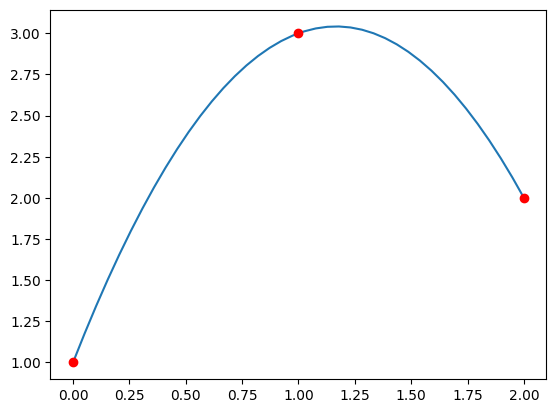

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_data = np.linspace(0, 2, 40)
plt.plot(x_data, p(x_data))
plt.plot(x, y, 'ro')
plt.show()


## Question 04 **[3 + 3 = 6 Marks]**


Suppose there is a function, $$ f(x) = x^4 + 3x^3 +2x^2 - 2x + 15$$

To analyze the behavior of the Absolute Error when approximating the derivative of the function at **$ x = 5 $** using **Central Difference**, you have to **determine the minimum value of h** that ensures the absolute error stays below a given **tolerance threshold of 0.002463**. Additionally, **calculate how many reductions of $ℎ$** are required to meet this condition.

As you already know,
1. Central Difference, $f^\prime(x) = \frac{f(x+h)-f(x-h)}{2*h}$
2. Absolute error = |Actual derivative - Approximate derivative|

You should start with an **initial step size of $ℎ = 0.5$** and iteratively **reduce $ℎ$ by one-third**, if necessary, until the error condition is satisfied.

**Hint:** You have to use **Polynomial class** from the **numpy** library to define the function, $f(x)$ and Your output should clearly state the **minimum $ℎ$** and the **total number of reductions** required to achieve the desired accuracy.


In [ ]:
#Write your code from here
# Write code here
from numpy.polynomial import Polynomial

# Define the function f(x) = x^4 + 3x^3 + 2x^2 - 2x + 15
p = Polynomial([15, -2, 2, 3, 1])  # coefficients low -> high

p_prime = p.deriv()  # exact derivative

# Central difference approximation
def central_diff(poly_func, h, x):
    return (poly_func(x + h) - poly_func(x - h)) / (2*h)

x0 = 5.0
tol = 0.002463
h = 0.5
reductions = 0
max_iter = 200

while reductions < max_iter:
    approx = central_diff(p, h, x0)
    exact = p_prime(x0)
    err = abs(exact - approx)
    if err < tol:
        break
    h /= 3  # reduce h
    reductions += 1

print(f"Minimum h to achieve |error| < {tol} : {h:.12e}")
print(f"Exact derivative at x={x0} = {exact:.12f}")
print(f"Central difference approx = {approx:.12f}")
print(f"Absolute error = {err:.12e}")
print(f"Total number of reductions required = {reductions}")


Minimum h to achieve |error| < 0.002463 : 6.172839506173e-03
Exact derivative at x=5.0 = 743.000000000000
Central difference approx = 743.000876390760
Absolute error = 8.763907599132e-04
Total number of reductions required = 4
